In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

In [2]:
df=pd.read_csv("moviesmod.csv",low_memory=False)

In [3]:
#Primer vistazo general a la data
df.head(5)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,name_director
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,...,81.0,['English'],Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,John Lasseter
1,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,...,104.0,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035,Larry J. Franco
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,...,101.0,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,Howard Deutch
3,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,...,127.0,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760,Forest Whitaker
4,Father of the Bride Collection,0.0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,...,106.0,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,0.000000,Alan Silvestri


In [8]:
#Creamos una lista con solo las variables numéricas
df_num= df.select_dtypes(include = (int,float))
df_num

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
0,30000000.0,862,21.946943,373554033.0,81.0,7.7,5415.0,1995,12.451801
1,65000000.0,8844,17.015539,262797249.0,104.0,6.9,2413.0,1995,4.043035
2,0.0,15602,11.712900,0.0,101.0,6.5,92.0,1995,0.000000
3,16000000.0,31357,3.859495,81452156.0,127.0,6.1,34.0,1995,5.090760
4,0.0,11862,8.387519,76578911.0,106.0,5.7,173.0,1995,0.000000
...,...,...,...,...,...,...,...,...,...
45371,0.0,30840,5.683753,0.0,104.0,5.7,26.0,1991,0.000000
45372,0.0,111109,0.178241,0.0,360.0,9.0,3.0,2011,0.000000
45373,0.0,67758,0.903007,0.0,90.0,3.8,6.0,2003,0.000000
45374,0.0,227506,0.003503,0.0,87.0,0.0,0.0,1917,0.000000


In [9]:
#Creamos un describe para un analisis rápido de la data. Una de estas columnas se descarta a dar información inútil(id)
df_num.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.537600e+04,45376.000000,45376.000000,4.537600e+04,45130.000000,45376.000000,45376.000000,45376.000000,4.537600e+04
mean,4.232604e+06,108027.103094,2.926458,1.123010e+07,94.181675,5.624070,110.096439,1991.881193,6.600428e+02
std,1.743986e+07,112168.377996,6.009672,6.438996e+07,38.341059,1.915423,491.742894,24.055360,7.469329e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26385.750000,0.388840,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59857.500000,1.130454,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156533.500000,3.691695,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


<Axes: >

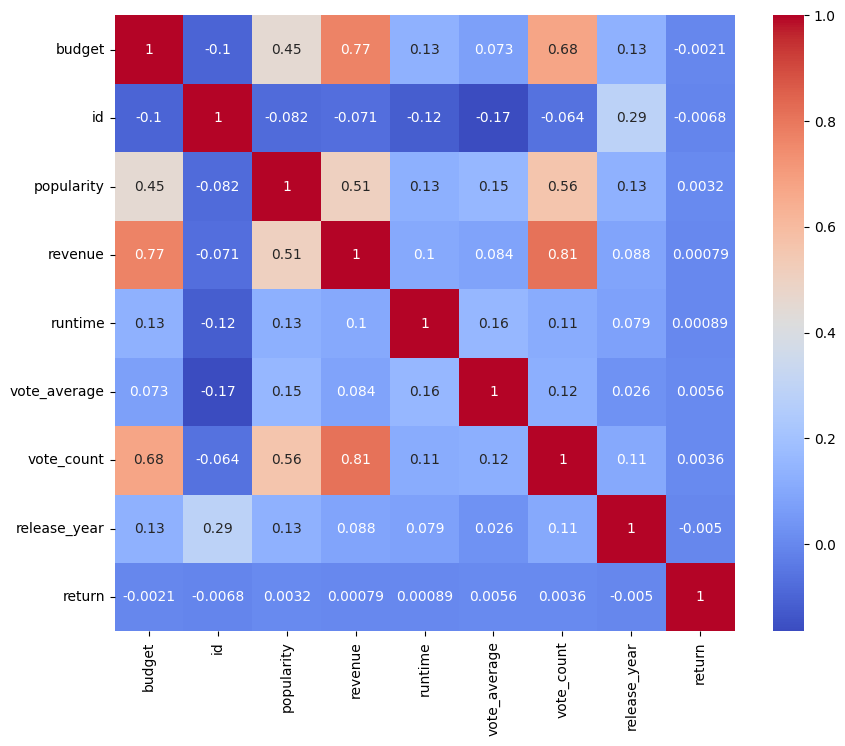

In [12]:
#Creamos una matriz de correlación
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#Conclusiones: Cuanto mayor es el budget mayor es el revenue y Cuanta más alta sea la calificación más popularidad

<Axes: ylabel='popularity'>

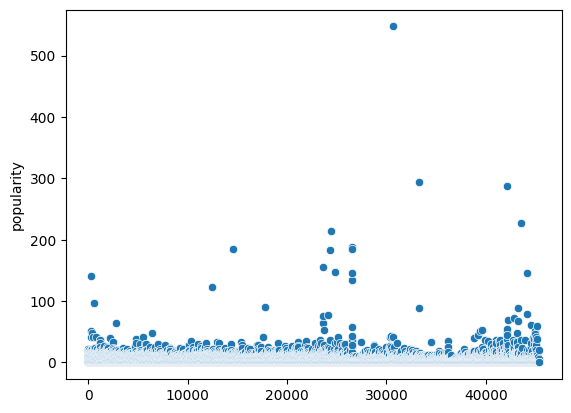

In [14]:
#Creamos un scatterplot para analizar la popularidad de las películas, se pueden observar ciertos outliers 
sns.scatterplot(df['popularity'])

In [7]:
#Tokenización del texto para crear la nube de palabras
df2 =  df.apply(lambda row: nltk.word_tokenize(row["title"]), axis=1)

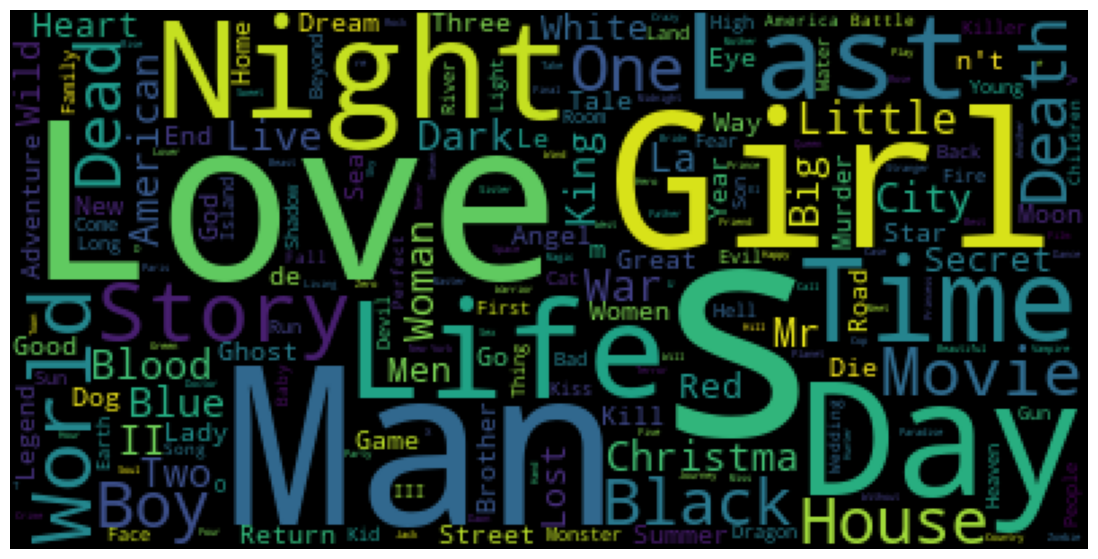

In [10]:
#Creamos la nube de palabras. Las más destacables son: Love, Night, Girl, Man, Day, Last, Time. 
text = WordCloud().generate(df2.to_string())
plt.figure(figsize=(16, 7))
plt.imshow(text)
plt.axis("off")
plt.show()

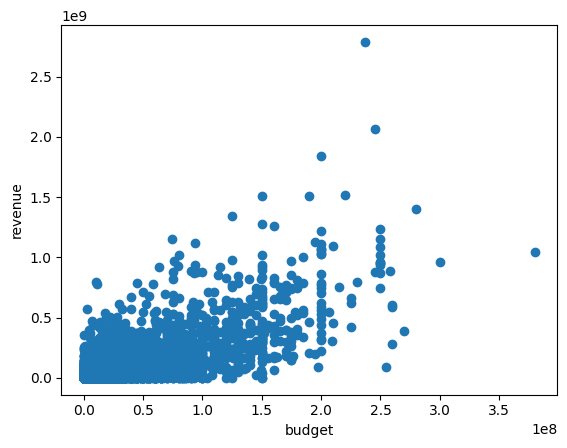

In [11]:
#Comparamos el la inversión con el retorno de ganancia
x = df['budget']
y = df['revenue']
plt.xlabel('budget')
plt.ylabel('revenue')
plt.scatter(x,y)
plt.show()

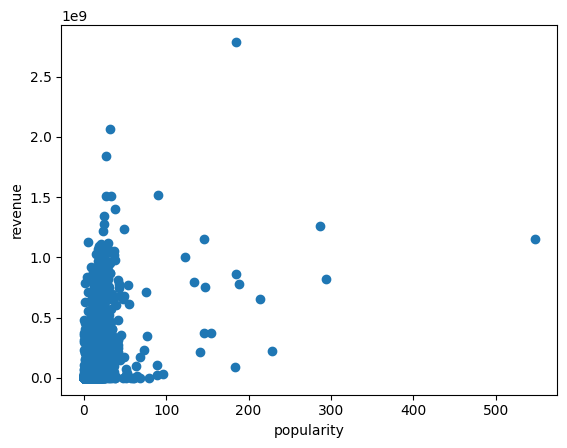

In [12]:
#Comparamos el la popularidad con el retorno de ganancia
x = df['popularity']
y = df['revenue']
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.scatter(x,y)
plt.show()

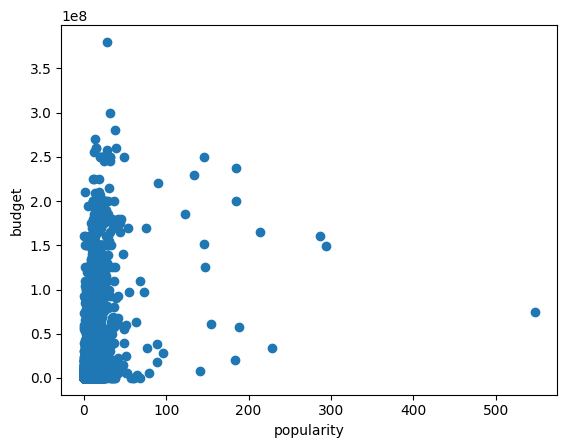

In [13]:
#Comparamos el la popularidad con la inversión
x = df['popularity']
y = df['budget']
plt.xlabel('popularity')
plt.ylabel('budget')
plt.scatter(x,y)
plt.show()